# House Price Prediction using "House Prices: Advanced Regression Techniques" dataset

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Not Needed
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from scipy.stats import skew, kurtosis

## Task-1

Load the dataset and display the first five rows.

In [36]:
df1 = pd.read_csv("./train.csv")
df1.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Check for missing values and handle them appropriately.

In [37]:
df1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [38]:
mean = df1['LotFrontage'].mean()
df1.fillna(mean, inplace=True)
df1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

Identify numerical columns and select at least three for analysis.

In [39]:
df1['OverallQual'].head()
df1['GrLivArea'].head()
df1['TotalBsmtSF'].head()

0     856
1    1262
2     920
3     756
4    1145
Name: TotalBsmtSF, dtype: int64

# Task-2

For each selected numeric column, compute and interpret:
• Mean
• Median
• Mode

In [40]:
print("Mean = ", df1['OverallQual'].mean() , "Median = ", df1['OverallQual'].median(), "Mode = ", df1['OverallQual'].mode()[0])

Mean =  6.0993150684931505 Median =  6.0 Mode =  5


In [41]:
print("Mean = ", df1['GrLivArea'].mean() , "Median = ", df1['GrLivArea'].median(), "Mode = ", df1['GrLivArea'].mode()[0])

Mean =  1515.463698630137 Median =  1464.0 Mode =  864


In [42]:
print("Mean = ", df1['TotalBsmtSF'].mean() , "Median = ", df1['TotalBsmtSF'].median(), "Mode = ", df1['TotalBsmtSF'].mode()[0])

Mean =  1057.4294520547944 Median =  991.5 Mode =  0


# Task-3

For the selected numeric columns, calculate:
• Range
• Variance
• Standard Deviation
• Interquartile Range (IQR)
1. Plot histograms and box plots to visualize dispersion.
2. Interpret the results to understand variability in the dataset.

              Range       Variance  Standard Deviation     IQR
OverallQual     9.0       1.912679            1.382997    2.00
GrLivArea    5308.0  276129.633363          525.480383  647.25
TotalBsmtSF  6110.0  192462.361709          438.705324  502.50


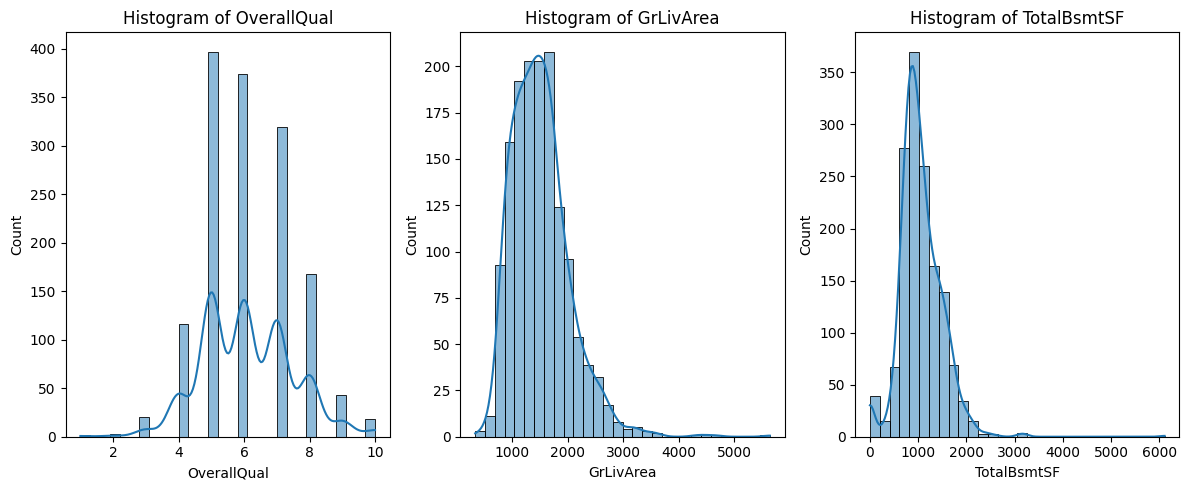

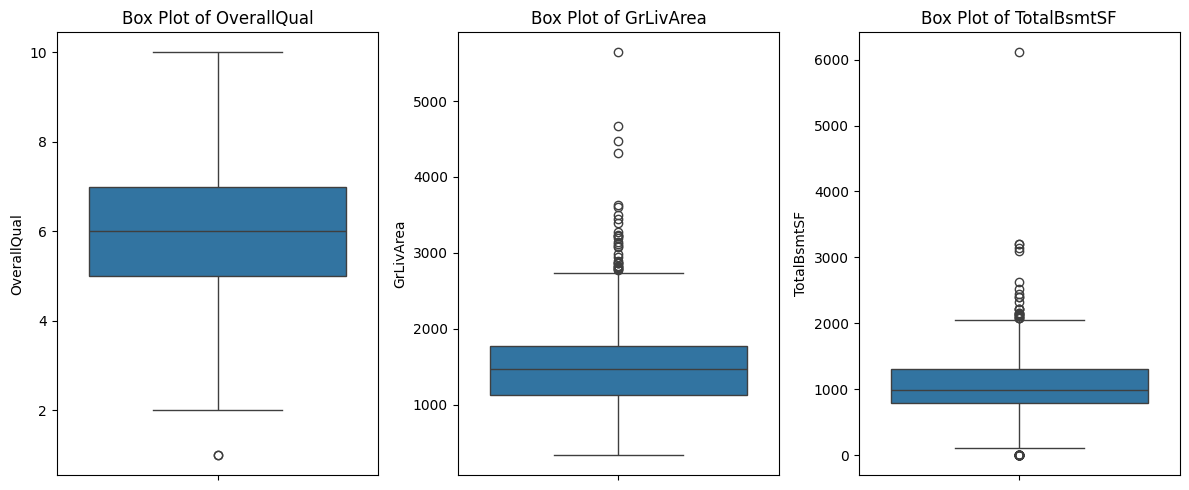

In [47]:
numeric_cols = ['OverallQual', 'GrLivArea', 'TotalBsmtSF']
stats = {}
for col in numeric_cols:
    min_val = df1[col].min()
    max_val = df1[col].max()
    range_val = max_val - min_val
    variance_val = df1[col].var()
    std_dev = df1[col].std()
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    iqr_val = Q3 - Q1
    
    stats[col] = {
        "Range": range_val,
        "Variance": variance_val,
        "Standard Deviation": std_dev,
        "IQR": iqr_val
    }

stats_df = pd.DataFrame(stats).T
print(stats_df)

plt.figure(figsize=(12, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df1[col], bins=30, kde=True)
    plt.title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

# Visualization: Box Plots
plt.figure(figsize=(12, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df1[col])
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

# Task-4

Compute skewness and kurtosis for the selected columns.

• Explain whether the data is symmetrical, left-skewed, or right-
skewed.

• Interpret whether the data distribution is normal, platykurtic, or
leptokurtic.

             Skewness   Kurtosis
OverallQual  0.216944   0.096293
GrLivArea    1.366560   4.895121
TotalBsmtSF  1.524255  13.250483


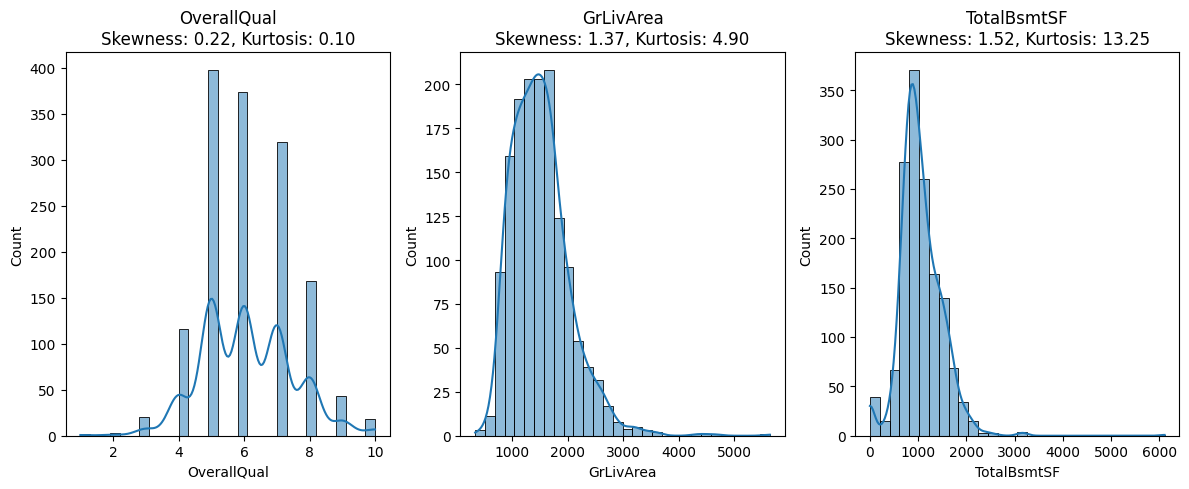

In [ ]:
stats = {}
for col in numeric_cols:
    skewness = df1[col].skew()
    kurt = df1[col].kurt()
    
    stats[col] = {
        "Skewness": skewness,
        "Kurtosis": kurt
    }

stats_df = pd.DataFrame(stats).T
print(stats_df)

plt.figure(figsize=(12, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df1[col], bins=30, kde=True)
    plt.title(f"{col}\nSkewness: {df1[col].skew():.2f}, Kurtosis: {df1[col].kurt():.2f}")

plt.tight_layout()
plt.show()

# Task-5

Compute the 25th, 50th, and 75th percentiles.

• Explain how these values help in detecting outliers.

• Identify outliers using the IQR method and visualize using a boxplot.

                 25%     50%      75%
OverallQual     5.00     6.0     7.00
GrLivArea    1129.50  1464.0  1776.75
TotalBsmtSF   795.75   991.5  1298.25
OverallQual: 2 outliers detected.
GrLivArea: 31 outliers detected.
TotalBsmtSF: 61 outliers detected.


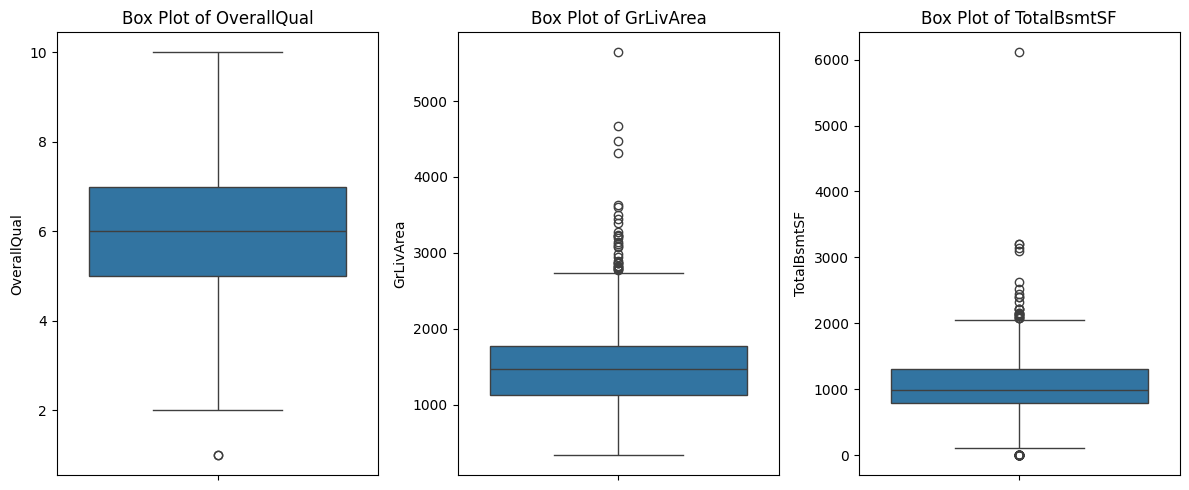

In [50]:
percentiles = df1[numeric_cols].describe(percentiles=[0.25, 0.50, 0.75]).T[['25%', '50%', '75%']]
print(percentiles)

outliers = {}
for col in numeric_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_values = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)][col]
    outliers[col] = outlier_values

for col in numeric_cols:
    print(f"{col}: {len(outliers[col])} outliers detected.")

plt.figure(figsize=(12, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df1[col])
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()